In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install pandas

In [ ]:
#from google.colab import files
#uploaded = files.upload()

#import io
#df1 = pd.read_csv(io.BytesIO(uploaded['file_out.csv']))


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['file_out2.csv']))

Saving file_out2.csv to file_out2.csv


In [ ]:
df.shape

(29103, 8)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29103 non-null  int64  
 1   InvoiceID   29103 non-null  int64  
 2   Date        29103 non-null  object 
 3   ProductID   29103 non-null  int64  
 4   TotalSales  29103 non-null  float64
 5   Discount    29103 non-null  float64
 6   CustomerID  29103 non-null  int64  
 7   Quantity    29103 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.8+ MB


In [ ]:
#Verisetinin index numarasını sildik
df.drop(df.columns[0],axis = 1, inplace = True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d' )

# Satış fiyatı 0 olarak girilen ürünleri temizleme

In [ ]:
veri = df.query('TotalSales == 0')
veri

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
2328,1930,2019-10-05,885,0.0,0.0,17,0
6533,4718,2019-04-13,751,0.0,0.0,404,0
8663,242,2019-01-15,1790,0.0,0.0,122,4
8665,244,2019-02-15,1470,0.0,0.0,129,4
8667,246,2019-02-28,1499,0.0,0.0,129,4
...,...,...,...,...,...,...,...
28893,196,2023-02-15,900,0.0,0.0,230,0
28894,197,2023-02-16,795,0.0,0.0,230,0
28895,198,2023-02-18,628,0.0,0.0,230,0
28896,198,2023-02-18,900,0.0,0.0,230,0


In [ ]:
df = df.query('TotalSales != 0')

In [ ]:
#aynı zamanda satış adeti 0 gözüken ürünlerde temizlenmiş oldu
veri = df.query('Quantity == 0')
veri

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity


# İndirim yüzdesi sütunu ekleme

In [ ]:
df['discount_percent'] = df['Discount']/(df['TotalSales']+df['Discount'])
df.to_csv('df.csv', index=False)

In [ ]:
df

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent
0,328,2019-12-27,1684,796.610169,143.389831,185,4,0.152542
1,329,2019-12-27,524,355.932203,64.067797,185,2,0.152542
2,330,2019-12-27,192,901.694915,162.305085,230,4,0.152542
3,330,2019-12-27,218,182.754237,32.895763,230,1,0.152542
4,330,2019-12-27,247,780.101695,140.418305,230,4,0.152542
...,...,...,...,...,...,...,...,...
29098,11092,2023-01-13,1644,6573.000000,1183.140000,269,1,0.152542
29099,11093,2023-01-13,352,5179.728814,932.351186,250,4,0.152542
29100,11094,2023-01-13,683,7741.423729,1393.456271,415,4,0.152542
29101,11095,2023-01-14,1830,3644.067797,655.932203,59,4,0.152542


In [ ]:
veri = df.query('discount_percent > 0.152543')
veri

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent
4719,3340,2019-01-15,1224,451.610169,320.389831,435,1,0.415013
11841,10639,2020-11-26,560,999.990339,180.009661,181,4,0.152551
16066,14035,2020-03-11,901,1195.780000,588.960000,364,2,0.329998
17872,7836,2021-04-06,1462,2155.932203,394.067797,415,6,0.154536
19325,7011,2021-01-07,578,1144.056356,205.943644,298,2,0.152551
20111,8212,2021-05-31,303,2457.602542,442.397458,272,10,0.152551
20299,8545,2021-07-08,1880,2929.661017,528.338983,344,2,0.152787
23603,8020,2022-06-08,1598,2280.508475,411.491525,269,2,0.152857
25060,12617,2022-06-29,393,2093.093220,376.906780,330,4,0.152594


In [ ]:
#ortalama indirim oranlarımızdan çok fazla indirim uygulanan 2 adet(901 ıd numaralı ürünün 364 numaralı müşteriye satışı ve 1224 numaralı ürünün 435 numaralı müşteriye satışı) satışımız var bunları çıkartmak istiyoruz.
df = df.query('discount_percent < 0.302543')
df

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent
0,328,2019-12-27,1684,796.610169,143.389831,185,4,0.152542
1,329,2019-12-27,524,355.932203,64.067797,185,2,0.152542
2,330,2019-12-27,192,901.694915,162.305085,230,4,0.152542
3,330,2019-12-27,218,182.754237,32.895763,230,1,0.152542
4,330,2019-12-27,247,780.101695,140.418305,230,4,0.152542
...,...,...,...,...,...,...,...,...
29098,11092,2023-01-13,1644,6573.000000,1183.140000,269,1,0.152542
29099,11093,2023-01-13,352,5179.728814,932.351186,250,4,0.152542
29100,11094,2023-01-13,683,7741.423729,1393.456271,415,4,0.152542
29101,11095,2023-01-14,1830,3644.067797,655.932203,59,4,0.152542


In [ ]:
veri = df.query('discount_percent < 0')
veri

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent
119,392,2019-10-05,1008,1830.51,-0.001520,252,2,-8.303704e-07
120,392,2019-10-05,1248,1864.41,-0.003220,252,2,-1.727091e-06
12141,22,2020-08-19,555,909.61,-0.002517,230,2,-2.767128e-06
12145,22,2020-08-19,555,909.61,-0.002517,230,2,-2.767128e-06
13297,261,2020-11-17,543,332574.46,-0.003959,420,2,-1.190410e-08
13301,299,2020-06-06,189,910.79,-0.003468,270,1,-3.807698e-06
13302,300,2020-06-22,1678,1658.26,-0.004681,122,6,-2.822846e-06
14798,301,2020-06-24,1568,2506.05,-0.000227,122,2,-9.058080e-08
14799,302,2020-08-17,1854,8410.41,-0.004694,122,2,-5.581182e-07
17620,307,2021-03-03,7,1201.68,-0.001111,122,1,-9.245398e-07


In [ ]:
df.loc[df['Discount'] < 0, 'Discount'] = 0

In [ ]:
df.loc[df['discount_percent'] < 0, 'discount_percent'] = 0

In [ ]:
veri = df.query('discount_percent < 0')
veri

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent


In [ ]:
veri = df.query('discount_percent < 0.152542')
veri = veri.query('discount_percent > 0.10')
veri

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent
14774,14073,2020-10-12,28,550.85,84.75,426,1,0.133339


# ELİMİNATE PRODUCT

In [ ]:
df_products = df.groupby('ProductID').count()#Dataframe içinde ki her ürünün kaç adet olduğu
df_products = df_products.iloc[:,0].to_frame()#Pandas serisi bir dataframe e çevrildi - pandas list change to dataframe
df_products.columns = ['SaleCount']#Sütunun ismini SaleCount yaptık - I renamed this column SaleCount
df_products = df_products[df_products['SaleCount']>100]#100 den az satış girişi olan veriyi çıkardım
df_products.head()

,SaleCount
ProductID,
49,103
86,138
98,240
152,102
164,136


In [ ]:
df_products['FirstDate'] = df.groupby('ProductID').min()['Date']
df_products['LastDate'] = df.groupby('ProductID').max()['Date']


In [ ]:
df_products.head()

,SaleCount,FirstDate,LastDate
ProductID,,,
49,103,2019-03-22,2023-03-01
86,138,2019-01-08,2021-12-17
98,240,2019-01-07,2022-04-08
152,102,2019-01-02,2022-12-10
164,136,2019-04-08,2022-02-28


In [ ]:
df_products['Duration'] = df_products['LastDate'] - df_products['FirstDate']#ilk ve son satış arasında kaç gün olduğunu buldum

In [ ]:
from datetime import timedelta

In [ ]:
df_products = df_products[df_products['Duration']>timedelta(days=300)]#ilk ve son atışı arasında 300 gün olmayan ürünleri tespit ettik (artık satılmayan veya yeni satılmaya başlamış ürünler olabilir diye)

In [ ]:
df_products = df_products[df_products['LastDate']>df['Date'].max() - timedelta(days=90)]#son 3 aydır satışı olmayan verileri eledik çünkü artık satılmıyor olabilir.

In [ ]:
df_demand = df[df['ProductID'].isin(df_products.index)]#kullanışlı ürünlerin ıd numaralarını filtreleyerek sadece o ürünlerin bütün verileriyle bir veriseti oluşturduk

In [ ]:
df_demand.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent
5,330,2019-12-27,252,1123.966102,202.313898,230,4,0.152542
6,330,2019-12-27,486,1251.084746,225.195254,230,4,0.152542
22,334,2019-12-28,1475,711.864407,128.135593,420,4,0.152542
30,340,2019-12-28,1498,389.830508,70.169492,254,2,0.152542
34,342,2019-12-28,1498,714.237288,128.562712,254,4,0.152542


# Adet fiyatı ekleme


In [ ]:
df['grain_price'] = df['TotalSales']/df['Quantity']
df.to_csv('df.csv', index=False)

<ipython-input-30-7362557bb948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grain_price'] = df['TotalSales']/df['Quantity']


In [ ]:
df_demand['grain_price'] = df_demand['TotalSales']/df_demand['Quantity']
df_demand.to_csv('df_demand.csv', index=False)

<ipython-input-31-feeb55091553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand['grain_price'] = df_demand['TotalSales']/df_demand['Quantity']


# ANALİZLER İÇİN VERİ SETİ HAZIRLAMA

In [ ]:
df_demand_test = df[df['ProductID'] == 252]
df_demand_test = df_demand_test.groupby('Date').sum()
df_demand_test = df_demand_test[['grain_price']]
pd.DatetimeIndex(df_demand_test.index).to_period('M')
df_demand_test.head()

,grain_price
Date,
2019-01-02,241.525424
2019-01-03,254.237288
2019-01-12,241.525424
2019-01-14,229.449152
2019-01-18,241.525424


# Moving average analysis

rolling fonksiyonu ile hareketli ortalama


In [ ]:
time_period = 3
SMA = df_demand_test['grain_price'].rolling(window=time_period).mean()

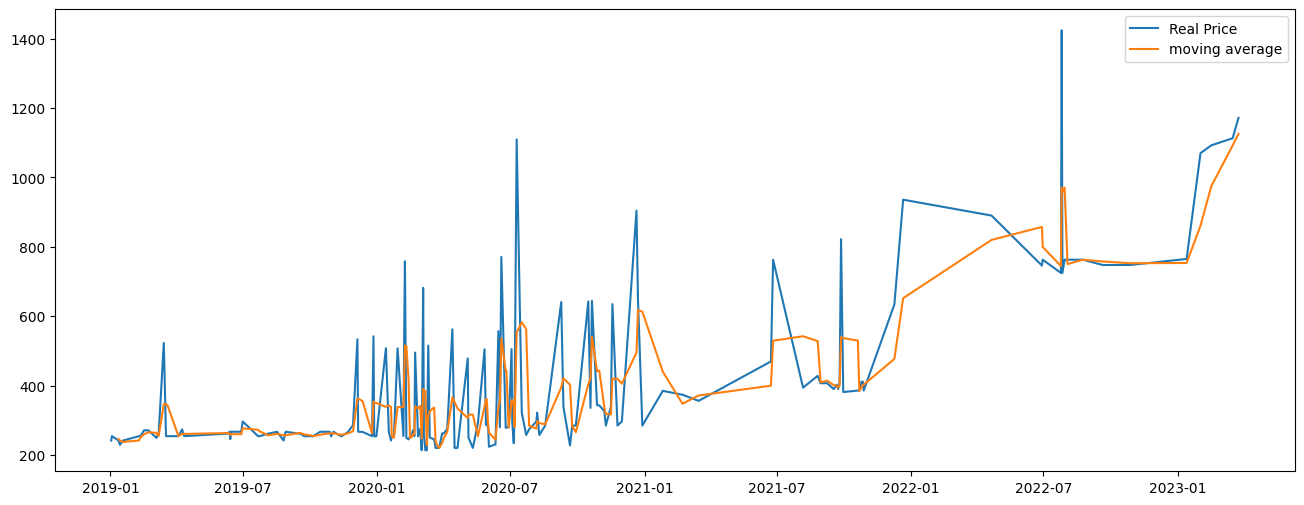

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(df_demand_test['grain_price'], label='Real Price')
plt.plot(SMA, label='moving average')
plt.legend()
plt.show()

# Time series analysis
Zaman serisi analizi

In [ ]:
# Verileri aylık olarak topladık
df2 = pd.read_csv('df_demand.csv', index_col='Date', parse_dates=True)

# Verilerinizi aylık olarak toplayın
df_monthly = df2.resample('M').sum()

df_monthly

,InvoiceID,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent,grain_price
Date,,,,,,,,
2019-01-31,232646,69882,7.546973e+04,13584.551183,17033,401,10.525424,13450.186442
2019-02-28,200794,55722,3.971886e+04,7149.395594,11255,197,7.779661,10339.423728
2019-03-31,280084,73682,6.033767e+04,10776.882205,14938,325,9.915254,12796.575424
2019-04-30,490130,130272,9.680527e+04,17424.948813,23099,559,16.016949,19219.813559
2019-05-31,452899,100107,8.696751e+04,15654.151527,17002,472,13.118644,16395.127120
2019-06-30,579500,125694,1.077064e+05,19387.151697,21470,561,15.711864,20292.813559
2019-07-31,58980,54965,4.898436e+04,8817.185591,10189,265,7.627119,9861.966102
2019-08-31,74231,61791,5.894683e+04,10610.429500,11760,277,8.694915,12512.737285
2019-09-30,78430,39161,4.704553e+04,8468.194576,10975,236,6.559322,9176.533898


In [ ]:
df_monthly = df_monthly.drop(['ProductID', 'InvoiceID', 'CustomerID', 'discount_percent'], axis=1)

In [ ]:
print(df_monthly.describe())

         TotalSales       Discount     Quantity    grain_price
count  5.100000e+01      51.000000    51.000000      51.000000
mean   3.228082e+05   58086.973881   634.784314   41310.149039
std    4.182837e+05   75302.145603   488.283988   47026.806513
min    2.788644e+04    5019.559323    54.000000    4433.898305
25%    5.964225e+04   10693.655853   279.500000   12561.771185
50%    9.869915e+04   17765.847461   472.000000   19775.513222
75%    4.144086e+05   74593.550599   889.500000   44659.110169
max    1.522880e+06  274118.343563  1844.000000  188248.983051


In [ ]:
df_monthly['Quantity'] = df_monthly['Quantity'] * 100

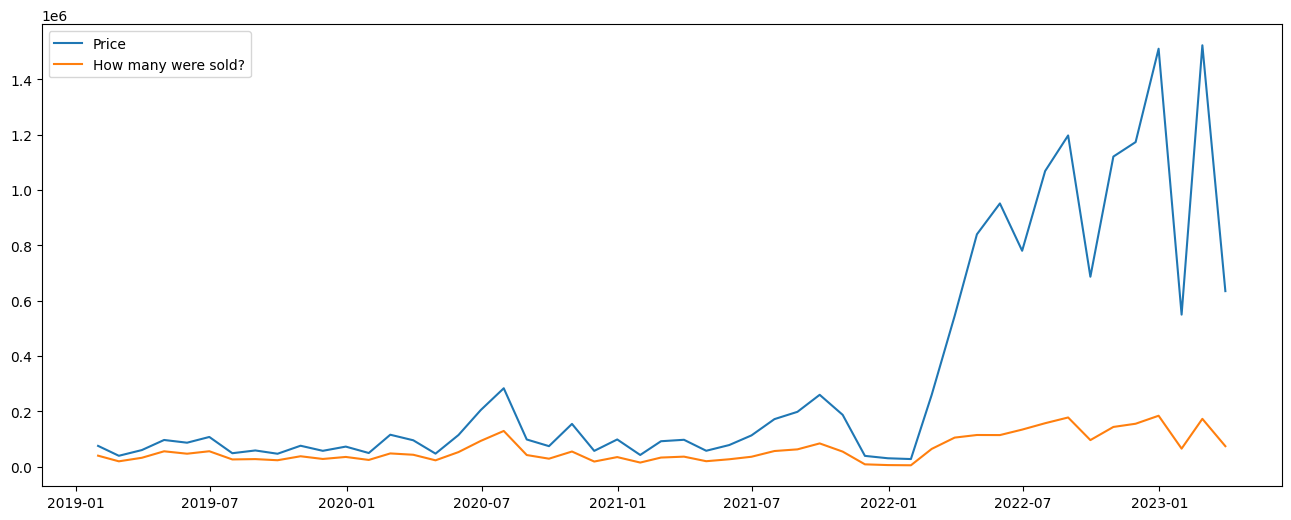

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(df_monthly['TotalSales'], label='Price')
plt.plot(df_monthly['Quantity'], label='How many were sold?')
plt.legend()
plt.show()

In [ ]:
df_monthly['Quantity'] = df_monthly['Quantity'] / 100

In [ ]:
df_monthly['avarage_price'] = df_monthly['TotalSales']/df_monthly['Quantity']
df_monthly.to_csv('df_monthly.csv', index=False)

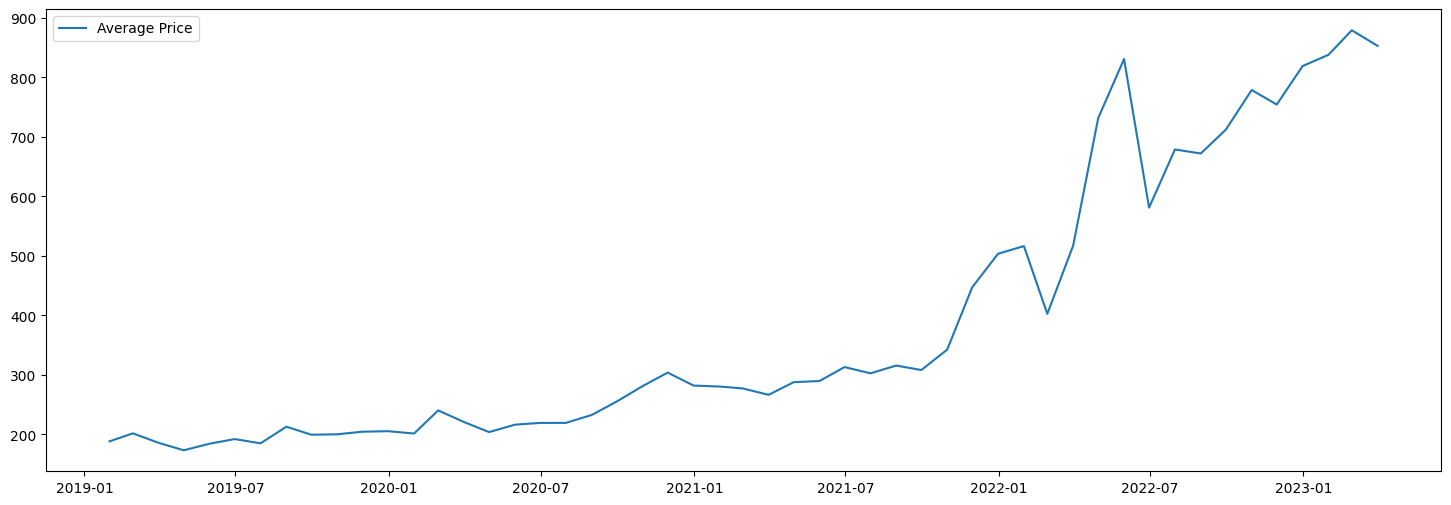

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df_monthly['avarage_price'], label='Average Price')
plt.legend()
plt.show()

# Aylara göre fiyat grafik

---



In [ ]:
df_yedek=df
df_yedek['Date'] = pd.to_datetime(df_yedek['Date'])
df_yedek=df_yedek.groupby(df_yedek['Date'].dt.month).mean()


<ipython-input-43-9362c3522c96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yedek['Date'] = pd.to_datetime(df_yedek['Date'])
<ipython-input-43-9362c3522c96>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_yedek=df_yedek.groupby(df_yedek['Date'].dt.month).mean()


In [ ]:
df_yedek['avarage_price'] = df_yedek['TotalSales']/df_yedek['Quantity']
df_yedek.to_csv('df_yedek.csv', index=False)

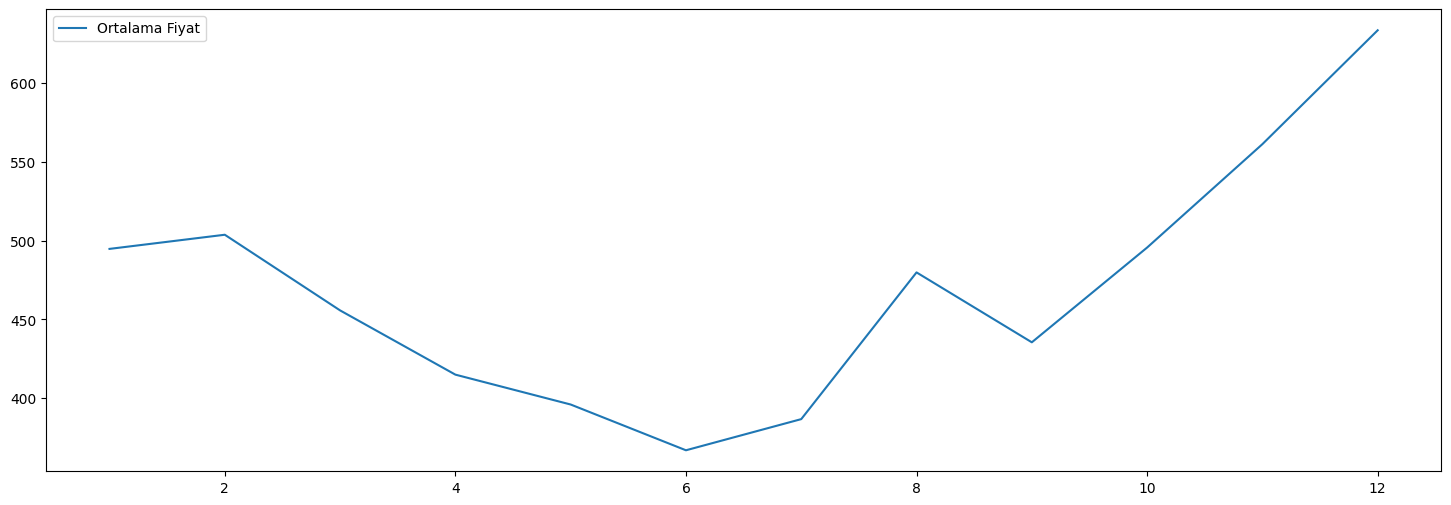

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df_yedek['avarage_price'], label='Ortalama Fiyat')
plt.legend()
plt.show()

# enflasyon hesabı

In [ ]:
df_demand_opti_test=df[df['ProductID'] == 252]

In [ ]:
#enflasyon hesaplama işlemi
silmek_istediklerim = ["Discount","TotalSales","ProductID","InvoiceID","CustomerID","Quantity","discount_percent"]

In [ ]:
df_demand_opti_test_enflasyon1=df_demand_opti_test.drop(silmek_istediklerim,axis=1,inplace=False)

In [ ]:
print(df_demand_opti_test_enflasyon1)

            Date  grain_price
5     2019-12-27   280.991526
42    2019-12-28   253.601695
92    2019-12-31   254.237288
593   2019-07-22   254.237288
646   2019-07-24   254.237288
...          ...          ...
28314 2023-02-01  1069.703390
28499 2023-03-17  1112.703390
28668 2023-03-25  1171.271187
28869 2023-02-16  1092.372881
29026 2023-01-13   764.830508

[203 rows x 2 columns]


In [ ]:
df_demand_opti_test_enflasyon1['Date'] = pd.to_datetime(df_demand_opti_test_enflasyon1['Date'])

In [ ]:
df_demand_opti_test_enflasyon1.sort_values('Date', inplace=True)

In [ ]:
baz_yil = 2019


df_demand_opti_test_enflasyon1['Baz Fiyat'] = df_demand_opti_test_enflasyon1[df_demand_opti_test_enflasyon1['Date'].dt.year == baz_yil]['grain_price'].values[0]
df_demand_opti_test_enflasyon1['Enflasyon Oranı'] = df_demand_opti_test_enflasyon1['grain_price'] / df_demand_opti_test_enflasyon1['Baz Fiyat'] - 1

In [ ]:
df_demand_opti_test_enflasyon1['Ay Ortalaması'] = df_demand_opti_test_enflasyon1.groupby(df_demand_opti_test_enflasyon1['Date'].dt.strftime('%Y'))['Enflasyon Oranı'].transform('mean')

In [ ]:
df_demand_opti_test['Enflasyon_Oranı'] = df_demand_opti_test_enflasyon1['Ay Ortalaması']

<ipython-input-54-5f072339d8a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_opti_test['Enflasyon_Oranı'] = df_demand_opti_test_enflasyon1['Ay Ortalaması']


In [ ]:
df_demand_opti_test.loc[df_demand_opti_test['Enflasyon_Oranı'] < 0, 'Enflasyon_Oranı'] = 0

In [ ]:
df_demand_opti_test

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent,grain_price,Enflasyon_Oranı
5,330,2019-12-27,252,1123.966102,202.313898,230,4,0.152542,280.991526,0.075444
42,348,2019-12-28,252,1014.406780,182.593220,230,4,0.152542,253.601695,0.075444
92,373,2019-12-31,252,1016.949153,183.050847,474,4,0.152542,254.237288,0.075444
593,731,2019-07-22,252,1016.949153,183.050847,44,4,0.152542,254.237288,0.075444
646,768,2019-07-24,252,1016.949153,183.050847,44,4,0.152542,254.237288,0.075444
...,...,...,...,...,...,...,...,...,...,...
28314,13752,2023-02-01,252,8557.627119,1540.372881,2,8,0.152542,1069.703390,3.314975
28499,13987,2023-03-17,252,4450.813559,801.146441,233,4,0.152542,1112.703390,3.314975
28668,11562,2023-03-25,252,4685.084746,843.315254,112,4,0.152542,1171.271187,3.314975
28869,13828,2023-02-16,252,4369.491525,786.508475,230,4,0.152542,1092.372881,3.314975


# OPTİMİZASYON

In [ ]:
!pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 38.1 MB/s eta 0:00:00


In [ ]:
import unittest
from pulp import *

In [ ]:
df_demand_opti_test = df_demand_opti_test.sort_values('Date')

In [ ]:
df_demand_opti_test

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent,grain_price,Enflasyon_Oranı
3606,2662,2019-01-02,252,2898.305085,521.694915,15,12,0.152542,241.525424,0.075444
3633,2681,2019-01-03,252,254.237288,45.762712,80,1,0.152542,254.237288,0.075444
4655,3298,2019-01-12,252,966.101695,173.898305,80,4,0.152542,241.525424,0.075444
4697,3321,2019-01-14,252,1835.593220,330.406780,15,8,0.152542,229.449152,0.075444
4769,3385,2019-01-18,252,966.101695,173.898305,290,4,0.152542,241.525424,0.075444
...,...,...,...,...,...,...,...,...,...,...
29026,13620,2023-01-13,252,764.830508,137.669492,230,1,0.152542,764.830508,3.314975
28314,13752,2023-02-01,252,8557.627119,1540.372881,2,8,0.152542,1069.703390,3.314975
28869,13828,2023-02-16,252,4369.491525,786.508475,230,4,0.152542,1092.372881,3.314975
28499,13987,2023-03-17,252,4450.813559,801.146441,233,4,0.152542,1112.703390,3.314975


In [ ]:
from pulp import *

# Problem tanımı
#LpMaximize ile problemimizin bir maksimuma ulaşma problemi olduğunu belirttik .
model = LpProblem("Fiyat_Optimizasyonu", LpMaximize)

In [ ]:
# Değişkenleri oluştur
#date sütununu ıd olarak belirleyerek o tarihte ki her adet fiyatını aldık bir dict oluşturup 2 sütunlu 1 sütun tarih 2. sütunda o tarihte ki adet fiyatı dedik.
#sonrasında belirli kurallara göre adet fiyatını (grain_price) maksimize etmeye çalışıcaz.
grain_price = LpVariable.dicts("grain_price", df_demand_opti_test['Date'], lowBound=0, cat='Continuous')


In [ ]:
# Objektif fonksiyonunu belirle
#model += lpSum([grain_price[i] for i in df_demand_opti_test['Date']])

In [ ]:
#amac fonk ekle(toplam satışın max olması gerektiğini belirtiyoruz adet fiyatı ve adeti çarparak)
model += lpSum([grain_price[i]*df_demand_opti_test.loc[df_demand_opti_test['Date'] == i, 'Quantity'].values[0] for i in df_demand_opti_test['Date']])


In [ ]:
# Kısıtları belirle
for index, row in df_demand_opti_test.iterrows():
    #Aşağıda ki iki satır verisetinde ki her bir satır için o tarihte ki ürün fiyatının o tarihte satılan miktar ve o tarihteki indirim göz önüne alınarak koşullar belirler.
    model += lpSum([grain_price[row['Date']]]) >= (row['TotalSales'] - row['Discount']) / row['Quantity'] * (1 - row['discount_percent'])
    model += lpSum([grain_price[row['Date']]]) <= ( row['TotalSales'] -row['Discount'])/ row['Quantity'] / (1 - row['discount_percent'])
    #Bu satır en düşük fiyat baz alınarak ilgili satırın enflasyonu ile çarpıldığı zaman gerekli değerin altında kalmaması gerektiğini söylüyor.
    model += lpSum([grain_price[row['Date']]]) >= (row['Enflasyon_Oranı']*df_demand_opti_test['grain_price'].min())

In [ ]:
# Kısıtları belirle
#for index, row in df_demand_opti_test.iterrows():
    #Aşağıda ki iki satır verisetinde ki her bir satır için o tarihte ki ürün fiyatının o tarihte satılan miktar ve o tarihteki indirim göz önüne alınarak koşullar belirler.
 #   model += lpSum([grain_price[row['Date']]]) >= (((row['Enflasyon_Oranı']+1)*df_demand_opti_test['TotalSales'].min()) - row['Discount']) / row['Quantity'] * (1 - row['discount_percent'])
  #  model += lpSum([grain_price[row['Date']]]) <= (((row['Enflasyon_Oranı']+1)*df_demand_opti_test['TotalSales'].mean()) -row['Discount'])/ row['Quantity'] / (1 - row['discount_percent'])
    #Bu satır en düşük fiyat baz alınarak ilgili satırın enflasyonu ile çarpıldığı zaman gerekli değerin altında kalmaması gerektiğini söylüyor.
   # model += lpSum([grain_price[row['Date']]]) >= (row['Enflasyon_Oranı']*df_demand_opti_test['grain_price'].min())

In [ ]:
# Modeli pulp kütüphanesinin solve() fonksiyonu ile çözüyoruz .row['TotalSales'] -

model.solve()


-1

In [ ]:
# En iyi fiyatları yazdır
for v in model.variables():
    print("TARİH: {}, Fiyat: {}".format(v.name[13:], round(v.varValue, 2)))



TARİH: 019_01_02_00:00:00, Fiyat: 233.7
TARİH: 019_01_03_00:00:00, Fiyat: 246.0
TARİH: 019_01_12_00:00:00, Fiyat: 233.7
TARİH: 019_01_14_00:00:00, Fiyat: 222.01
TARİH: 019_01_18_00:00:00, Fiyat: 233.7
TARİH: 019_02_09_00:00:00, Fiyat: 246.0
TARİH: 019_02_11_00:00:00, Fiyat: 246.0
TARİH: 019_02_16_00:00:00, Fiyat: 262.21
TARİH: 019_02_22_00:00:00, Fiyat: 262.21
TARİH: 019_03_05_00:00:00, Fiyat: 241.08
TARİH: 019_03_06_00:00:00, Fiyat: 246.0
TARİH: 019_03_08_00:00:00, Fiyat: 254.18
TARİH: 019_03_15_00:00:00, Fiyat: 241.08
TARİH: 019_03_18_00:00:00, Fiyat: 246.0
TARİH: 019_03_20_00:00:00, Fiyat: 246.0
TARİH: 019_04_04_00:00:00, Fiyat: 246.0
TARİH: 019_04_09_00:00:00, Fiyat: 264.78
TARİH: 019_04_12_00:00:00, Fiyat: 246.0
TARİH: 019_06_11_00:00:00, Fiyat: 253.13
TARİH: 019_06_13_00:00:00, Fiyat: 258.3
TARİH: 019_06_14_00:00:00, Fiyat: 237.8
TARİH: 019_06_15_00:00:00, Fiyat: 258.3
TARİH: 019_06_29_00:00:00, Fiyat: 258.3
TARİH: 019_07_01_00:00:00, Fiyat: 287.0
TARİH: 019_07_22_00:00:00, Fiyat

# Demand Prediction

In [ ]:
df_demand_test3 = df[df['ProductID'] == 252]
df_demand_test3 = df_demand_test3.groupby('Date').sum()
df_demand_test3 = df_demand_test3[['TotalSales']]
pd.DatetimeIndex(df_demand_test3.index).to_period('M')
df_demand_test3.head()

,TotalSales
Date,
2019-01-02,2898.305085
2019-01-03,254.237288
2019-01-12,966.101695
2019-01-14,1835.593220
2019-01-18,966.101695


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.0 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_demand_test3, start_p=1, start_q=1,
                          max_p=4, max_q=4, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=3, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,3,1)[12]             : AIC=inf, Time=4.89 sec
 ARIMA(0,0,0)(0,3,0)[12]             : AIC=2632.685, Time=0.29 sec
 ARIMA(1,0,0)(1,3,0)[12]             : AIC=inf, Time=5.43 sec
 ARIMA(0,0,1)(0,3,1)[12]             : AIC=inf, Time=4.98 sec
 ARIMA(0,0,0)(1,3,0)[12]             : AIC=inf, Time=2.63 sec
 ARIMA(0,0,0)(0,3,1)[12]             : AIC=inf, Time=2.69 sec
 ARIMA(0,0,0)(1,3,1)[12]             : AIC=inf, Time=6.35 sec
 ARIMA(1,0,0)(0,3,0)[12]             : AIC=2631.977, Time=1.03 sec
 ARIMA(1,0,0)(0,3,1)[12]             : AIC=inf, Time=8.19 sec
 ARIMA(1,0,0)(1,3,1)[12]             : AIC=inf, Time=5.46 sec
 ARIMA(2,0,0)(0,3,0)[12]             : AIC=2632.554, Time=2.24 sec
 ARIMA(1,0,1)(0,3,0)[12]             : AIC=inf, Time=4.01 sec
 ARIMA(0,0,1)(0,3,0)[12]             : AIC=2631.332, Time=2.42 sec
 ARIMA(0,0,1)(1,3,0)[12]             : AIC=2480.335, Time=6.60 sec
 ARIMA(0,0,1)(2,3,0)[12]             : AIC=inf, Time=9.56 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  170
Model:             SARIMAX(0, 0, 1)x(1, 3, [], 12)   Log Likelihood               -1237.168
Date:                             Fri, 04 Aug 2023   AIC                           2480.335
Time:                                     00:30:45   BIC                           2489.029
Sample:                                          0   HQIC                          2483.868
                                             - 170                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1690      0.076     -2.214      0.027      -0.319      -0.019
ar.S.L12      -1.0000      0.043    -23.074      0.000      -1.085      -0.915
sigma2       3.48e+06   2.11e+05     16.463      0.000    3.07e+06    3.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               190.10
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               2.47   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
modelSales = ARIMA(df_demand_test3,
                  order=(1,1,1),
                  seasonal_order=(1,1,1, 12))

resultSales = modelSales.fit()

# Prediction of the Test data
predictionsSalesTest = resultSales.predict(len(df_demand_test3), len(df_demand_test3)+180, typ='levels').rename("Predictions")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predictionsSalesTest.index = range(len(predictionsSalesTest))

In [ ]:
predictionsSalesTest.index = [df_demand_test3.index.max() + timedelta(days=x) for x in predictionsSalesTest.index]

In [ ]:
predictionsSalesTest2=predictionsSalesTest

In [ ]:
type(predictionsSalesTest)

pandas.core.series.Series

In [ ]:
df_predSalesTest = pd.DataFrame(predictionsSalesTest)

In [ ]:
df_predSalesTest

,Predictions
2023-03-25,7055.933014
2023-03-26,3774.553315
2023-03-27,4104.059159
2023-03-28,4178.513256
2023-03-29,4067.003993
...,...
2023-09-17,13956.199252
2023-09-18,11981.015354
2023-09-19,12112.311918
2023-09-20,12443.079588


In [ ]:
df_predSalesTest.reset_index(inplace=True)


In [ ]:
df_predSalesTest = df_predSalesTest.rename(columns={"index": "Date"})

In [ ]:
df_predSalesTest = df_predSalesTest.groupby('Date').sum()

pd.DatetimeIndex(df_predSalesTest.index).to_period('M')

PeriodIndex(['2023-03', '2023-03', '2023-03', '2023-03', '2023-03', '2023-03',
             '2023-03', '2023-04', '2023-04', '2023-04',
             ...
             '2023-09', '2023-09', '2023-09', '2023-09', '2023-09', '2023-09',
             '2023-09', '2023-09', '2023-09', '2023-09'],
            dtype='period[M]', name='Date', length=181)

In [ ]:
df_predSalesTest = df_predSalesTest.rename(columns={"Predictions": "TotalSales"})

In [ ]:
df_predSalesTest

,TotalSales
Date,
2023-03-25,7055.933014
2023-03-26,3774.553315
2023-03-27,4104.059159
2023-03-28,4178.513256
2023-03-29,4067.003993
...,...
2023-09-17,13956.199252
2023-09-18,11981.015354
2023-09-19,12112.311918


In [ ]:
df_quantity_top=pd.concat([df_demand_test3, df_predSalesTest], axis=0)


In [ ]:
df_quantity_top

,TotalSales
Date,
2019-01-02,2898.305085
2019-01-03,254.237288
2019-01-12,966.101695
2019-01-14,1835.593220
2019-01-18,966.101695
...,...
2023-09-17,13956.199252
2023-09-18,11981.015354
2023-09-19,12112.311918


In [ ]:
stepwise_fit = auto_arima(df_quantity_top, start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=5667.553, Time=1.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6092.624, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5850.390, Time=2.60 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5671.739, Time=3.53 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=5795.482, Time=1.28 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=5669.532, Time=4.54 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=5669.532, Time=10.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=5718.590, Time=3.34 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=13.65 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=5796.708, Time=1.78 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=5669.098, Time=7.12 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=5663.631, Time=7.92 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=5796.395, Time=1.60 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=5673.832, Time=4.55 sec
 ARIMA(1,1,2)(0,1,2)[1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  351
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2826.816
Date:                              Fri, 04 Aug 2023   AIC                           5663.631
Time:                                      00:32:39   BIC                           5682.746
Sample:                                           0   HQIC                          5671.249
                                              - 351                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7352      0.123      5.981      0.000       0.494       0.976
ma.L1         -1.7976      0.088    -20.471      0.000      -1.970      -1.625
ma.L2          0.8298      0.080     10.422      0.000       0.674       0.986
ma.S.L12      -0.7396      0.034    -21.770      0.000      -0.806      -0.673
sigma2      1.057e+06    2.5e+04     42.329      0.000    1.01e+06    1.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             26047.45
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             4.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
modelSales2 = ARIMA(df_quantity_top,
                  order=(1,0,0),
                  seasonal_order=(1,1,1, 12))

resultSales2 = modelSales2.fit()
trend = resultSales2.predict(typ='trend')
seasonal = resultSales2.predict(typ='seasonal')



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
TotalDemand = predictionsSalesTest.sum()
TotalDemand

1506526.4209090215

# quantity prediction with totalsales prediction

In [ ]:
df_demand_quantity = df[df['ProductID'] == 252]
df_demand_quantity = df_demand_quantity.groupby('Date').sum()
df_demand_quantity = df_demand_quantity[['Quantity']]
pd.DatetimeIndex(df_demand_quantity.index).to_period('M')
df_demand_quantity.head()

,Quantity
Date,
2019-01-02,12
2019-01-03,1
2019-01-12,4
2019-01-14,8
2019-01-18,4


In [ ]:
new_column2 = df_demand_quantity['Quantity']
new_column2

Date
2019-01-02    12
2019-01-03     1
2019-01-12     4
2019-01-14     8
2019-01-18     4
              ..
2023-01-13     1
2023-02-01     8
2023-02-16     4
2023-03-17     4
2023-03-25     4
Name: Quantity, Length: 170, dtype: int64

In [ ]:
new_column = df_demand_test3['TotalSales']
new_column

Date
2019-01-02    2898.305085
2019-01-03     254.237288
2019-01-12     966.101695
2019-01-14    1835.593220
2019-01-18     966.101695
                 ...     
2023-01-13     764.830508
2023-02-01    8557.627119
2023-02-16    4369.491525
2023-03-17    4450.813559
2023-03-25    4685.084746
Name: TotalSales, Length: 170, dtype: float64

In [ ]:
# Özelleştirilmiş bölücüler ve özel ağırlıklandırma işlemleri için fonksiyonlar oluşturalım
def trend_split(X):

    X['trend'] = trend
    X['trend_binary'] = trend.diff().fillna(0).apply(lambda x: 4 if x > 0 else 0)
    return X[['trend_binary']]

In [ ]:
def seasonal_weight(X):
    # Mevsimsel özelliklere göre ağırlıklandırma işlemi

    X['seasonal'] = seasonal
    X['weight'] = seasonal.apply(lambda x: 8 if x > 0 else 1)
    return X[['weight']]

In [ ]:
df_quantity_top = pd.concat([df_quantity_top, trend_split(df_quantity_top), seasonal_weight(df_quantity_top)], axis=1)

In [ ]:
df_quantity_top

,TotalSales,trend,trend_binary,seasonal,weight,trend_binary,weight
Date,,,,,,,
2019-01-02,2898.305085,0.000000,0,0.000000,1,0,1
2019-01-03,254.237288,314.955959,4,314.955959,8,4,8
2019-01-12,966.101695,43.273741,0,43.273741,8,0,8
2019-01-14,1835.593220,106.582092,4,106.582092,8,4,8
2019-01-18,966.101695,203.727674,4,203.727674,8,4,8
...,...,...,...,...,...,...,...
2023-09-17,13956.199252,13282.071564,4,13282.071564,8,4,8
2023-09-18,11981.015354,11306.887666,0,11306.887666,8,0,8
2023-09-19,12112.311918,11438.184230,4,11438.184230,8,4,8


In [ ]:
df_predSalesTest=df_quantity_top.tail(91)

In [ ]:
df_demand_test3=df_quantity_top.head(170)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(max_depth =3,n_estimators = 120,random_state=0)
rf_reg.fit(df_demand_test3,new_column2)

RandomForestRegressor(max_depth=3, n_estimators=120, random_state=0)

In [ ]:
df_predSalesTest

,TotalSales,trend,trend_binary,seasonal,weight,trend_binary,weight
Date,,,,,,,
2023-06-23,6929.318051,6255.189428,0,6255.189428,8,0,8
2023-06-24,7172.170196,6498.040467,4,6498.040467,8,4,8
2023-06-25,10114.631634,9440.506798,4,9440.506798,8,4,8
2023-06-26,8139.447736,7465.320209,0,7465.320209,8,0,8
2023-06-27,8270.744300,7596.617021,4,7596.617021,8,4,8
...,...,...,...,...,...,...,...
2023-09-17,13956.199252,13282.071564,4,13282.071564,8,4,8
2023-09-18,11981.015354,11306.887666,0,11306.887666,8,0,8
2023-09-19,12112.311918,11438.184230,4,11438.184230,8,4,8


In [ ]:
y_pred_rf_reg=rf_reg.predict(df_predSalesTest)

In [ ]:
y_pred_rf_reg

array([11.18445716, 15.25515956, 22.29645016, 12.78556048, 15.25515956,
       15.25515956, 22.68466206, 12.78556048, 15.25515956, 15.25515956,
       12.78556048, 12.78556048, 12.78556048, 15.25515956, 22.29645016,
       12.78556048, 15.25515956, 22.31311683, 22.68466206, 12.78556048,
       21.96316292, 21.96316292, 12.78556048, 12.78556048, 12.78556048,
       15.25515956, 23.55966206, 18.61851775, 22.31311683, 22.31311683,
       22.68466206, 18.61851775, 22.31311683, 22.31311683, 18.61851775,
       18.61851775, 12.78556048, 15.25515956, 22.68466206, 18.61851775,
       22.31311683, 22.29645016, 22.68466206, 18.61851775, 22.29645016,
       22.29645016, 18.57685109, 18.61851775, 18.61851775, 22.31311683,
       22.68466206, 18.57685109, 22.29645016, 22.29645016, 22.68466206,
       18.57685109, 22.29645016, 22.29645016, 18.57685109, 18.57685109,
       18.61851775, 22.31311683, 22.68466206, 18.57685109, 22.29645016,
       23.55966206, 22.68466206, 18.57685109, 23.55966206, 23.55

# Model Secimi

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df_demand_quantity2 = df[df['ProductID'] == 252]
df_demand_quantity2 = df_demand_quantity2.groupby('Date').sum()
df_demand_quantity2 = df_demand_quantity2[['TotalSales']]
pd.DatetimeIndex(df_demand_quantity2.index).to_period('M')
df_demand_quantity2.head()

,TotalSales
Date,
2019-01-02,2898.305085
2019-01-03,254.237288
2019-01-12,966.101695
2019-01-14,1835.593220
2019-01-18,966.101695


In [ ]:
#lstm


In [ ]:
# Veri setini normalize ediniz
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_demand_quantity2['TotalSales'].values.reshape(-1, 1))

In [ ]:
X = []
y = []
lookback = 10

for i in range(len(scaled_data) - lookback):
    X.append(scaled_data[i:i + lookback, 0])
    y.append(scaled_data[i + lookback, 0])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Veri setini eğitim ve test setlerine ayırın
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# LSTM modelini oluşturun
model = Sequential()
model.add(LSTM(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
# Modeli eğitin
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)


Epoch 1/10
8/8 [==============================] - 2s 6ms/step - loss: 0.0103
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 10/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0069


In [ ]:
# Tahmin yapın
predictions = model.predict(X_test)

1/1 [==============================] - 0s 498ms/step


In [ ]:
# Tahminleri yeniden ölçeklendirin
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Tahminleri ve gerçek değerleri yazdırın
for i in range(len(predictions)):
    print("Gerçek Değer: {:.2f}, Tahmin: {:.2f}".format(y_test[i, 0], predictions[i, 0]))

Gerçek Değer: 3423.73, Tahmin: 1461.04
Gerçek Değer: 1627.12, Tahmin: 1469.51
Gerçek Değer: 406.78, Tahmin: 1474.23
Gerçek Değer: 779.66, Tahmin: 1485.08
Gerçek Değer: 1610.17, Tahmin: 1490.41
Gerçek Değer: 1559.32, Tahmin: 1481.75
Gerçek Değer: 1627.12, Tahmin: 1456.35
Gerçek Değer: 2457.63, Tahmin: 1448.00
Gerçek Değer: 3050.85, Tahmin: 1448.40
Gerçek Değer: 4627.12, Tahmin: 1437.30
Gerçek Değer: 3084.75, Tahmin: 1464.29
Gerçek Değer: 3288.14, Tahmin: 1506.24
Gerçek Değer: 1644.07, Tahmin: 1565.12
Gerçek Değer: 3084.75, Tahmin: 1635.71
Gerçek Değer: 2535.59, Tahmin: 1662.48
Gerçek Değer: 935.59, Tahmin: 1680.99
Gerçek Değer: 3559.32, Tahmin: 1695.91
Gerçek Değer: 2983.05, Tahmin: 1672.42
Gerçek Değer: 3050.85, Tahmin: 1665.77
Gerçek Değer: 2898.31, Tahmin: 1659.82
Gerçek Değer: 13525.42, Tahmin: 1641.67
Gerçek Değer: 1449.15, Tahmin: 1630.47
Gerçek Değer: 3050.85, Tahmin: 1797.85
Gerçek Değer: 3050.85, Tahmin: 1891.99
Gerçek Değer: 3050.85, Tahmin: 1920.71
Gerçek Değer: 2989.83, Tahm

In [ ]:
#sarımax
import statsmodels.api as sm

In [ ]:
train_data = df_demand_quantity2.loc[:'2019-08-31', 'TotalSales']
test_data = df_demand_quantity2.loc['2021-09-08':, 'TotalSales']


In [ ]:
model = sm.tsa.SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observatio

In [ ]:
test_data

Date
2021-09-08      406.779661
2021-09-17      779.661017
2021-09-21     1610.169492
2021-09-23     1559.322034
2021-09-25     1627.118644
2021-09-27     2457.627119
2021-09-30     3050.847458
2021-10-20     4627.118644
2021-10-22     3084.745763
2021-10-25     3288.135593
2021-10-27     1644.067797
2021-10-28     3084.745763
2021-12-09     2535.593220
2021-12-21      935.593220
2022-04-21     3559.322034
2022-06-29     2983.050847
2022-06-30     3050.847458
2022-07-25     2898.305085
2022-07-26    13525.423728
2022-07-27     1449.152542
2022-07-30     3050.847458
2022-08-03     3050.847458
2022-08-24     3050.847458
2022-09-20     2989.830508
2022-10-28     1494.915254
2023-01-13      764.830508
2023-02-01     8557.627119
2023-02-16     4369.491525
2023-03-17     4450.813559
2023-03-25     4685.084746
Name: TotalSales, dtype: float64

In [ ]:
forecast = results.get_forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast.predicted_mean

31    1208.793522
32    1211.039285
33    1207.247434
34    1208.528473
35    1206.888264
36    1214.059253
37    1207.191962
38    1210.391794
39    1212.526969
40    1211.179224
41    1206.494152
42    1207.874652
43    1208.422285
44    1210.664287
45    1206.878456
46    1208.157296
47    1206.519622
48    1213.678869
49    1206.822581
50    1210.017106
51    1212.148698
52    1210.803014
53    1206.125409
54    1207.503549
55    1208.050172
56    1210.288419
57    1206.508598
58    1207.785244
59    1206.150100
60    1213.297624
Name: predicted_mean, dtype: float64

In [ ]:
predicted_values = forecast.predicted_mean

In [ ]:
mae = mean_absolute_error(test_data,predicted_values)

In [ ]:
print(mae)

2075.2856204927407


In [ ]:
mse = mean_squared_error(test_data, predicted_values)

In [ ]:
print(mse)

9941776.907234488


In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)

In [ ]:
print(rmse)

3153.058341869761


In [ ]:
# Orantılı Mutlak Hata (MAPE)
mape = np.mean(np.abs((test_data - predicted_values) / test_data)) * 100

<ipython-input-129-bf8a8b7a530b>:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test_data - predicted_values) / test_data)) * 100


In [ ]:
print(mape)

nan


In [ ]:
print(r2_score(test_data,predicted_values))

-0.6149389285533935


In [ ]:
#prophet
from prophet import Prophet

In [ ]:
df_demand_quantity3 = df[df['ProductID'] == 252]
df_demand_quantity3 = df_demand_quantity3.groupby('Date').sum()
df_demand_quantity3 = df_demand_quantity3[['TotalSales']]
df_demand_quantity3.head()

,TotalSales
Date,
2019-01-02,2898.305085
2019-01-03,254.237288
2019-01-12,966.101695
2019-01-14,1835.593220
2019-01-18,966.101695


In [ ]:
train_size = int(len(df_demand_quantity3) * 0.8)
train_data = df_demand_quantity3[:train_size]
test_data = df_demand_quantity3[train_size:]

In [ ]:
train_data.reset_index(inplace=True)

In [ ]:
train_data = train_data.rename(columns={ 'TotalSales': 'y'})
train_data.index.name = 'ds'
train_data = train_data.rename(columns={ 'Date': 'ds'})
train_data['ds'] = pd.to_datetime(train_data['ds'])

In [ ]:
train_data

,ds,y
ds,,
0,2019-01-02,2898.305085
1,2019-01-03,254.237288
2,2019-01-12,966.101695
3,2019-01-14,1835.593220
4,2019-01-18,966.101695
...,...,...
131,2020-12-29,569.491525
132,2021-01-26,384.745763
133,2021-02-22,2241.355932


In [ ]:
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpknm_g6ss/tlv4l98i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpknm_g6ss/hb_dcnkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21903', 'data', 'file=/tmp/tmpknm_g6ss/tlv4l98i.json', 'init=/tmp/tmpknm_g6ss/hb_dcnkd.json', 'output', 'file=/tmp/tmpknm_g6ss/prophet_modelyfg6ocfk/prophet_model-20230804003250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_data.reset_index(inplace=True)
test_data = test_data.rename(columns={ 'TotalSales': 'y'})
test_data.index.name = 'ds'
test_data = test_data.rename(columns={ 'Date': 'ds'})
test_data['ds'] = pd.to_datetime(test_data['ds'])

In [ ]:
# Tahminleri yapın
forecast = model.predict(test_data)

In [ ]:
predict=forecast.yhat

In [ ]:
mae = mean_absolute_error(test_data.y,predict)

In [ ]:
print(mae)

1581.224446692683


In [ ]:
mse = mean_squared_error(test_data.y, forecast.yhat)

In [ ]:
print(mse)

6595483.673050571


In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)

In [ ]:
print(rmse)

2568.1673763698836


In [ ]:
# Orantılı Mutlak Hata (MAPE)
mape = np.mean(np.abs((test_data.y - forecast.yhat) / test_data.y)) * 100

In [ ]:
print(mape)

66.82258228997573


In [ ]:
print(r2_score(test_data.y,forecast.yhat))

-0.18439270677284791


In [ ]:
#arima

In [ ]:
df_demand_quantity2 = df[df['ProductID'] == 252]
df_demand_quantity2 = df_demand_quantity2.groupby('Date').sum()
df_demand_quantity2 = df_demand_quantity2[['TotalSales']]
pd.DatetimeIndex(df_demand_quantity2.index).to_period('M')
df_demand_quantity2.head()

,TotalSales
Date,
2019-01-02,2898.305085
2019-01-03,254.237288
2019-01-12,966.101695
2019-01-14,1835.593220
2019-01-18,966.101695


In [ ]:
stepwise_fit = auto_arima(df_demand_quantity2, start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2760.253, Time=1.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2928.620, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2830.061, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2761.110, Time=0.82 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2795.846, Time=0.40 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2762.226, Time=1.21 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2762.227, Time=2.15 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2771.685, Time=0.98 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=3.25 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2818.065, Time=0.52 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2762.043, Time=3.84 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2763.375, Time=1.91 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2872.520, Time=0.50 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2760.078, Time=0.78 sec
 ARIMA(0,1,2)(0,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  170
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1374.626
Date:                              Fri, 04 Aug 2023   AIC                           2759.251
Time:                                      00:33:49   BIC                           2774.533
Sample:                                           0   HQIC                          2765.458
                                              - 170                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.2100      3.107      1.677      0.094      -0.879      11.299
ma.L1         -1.0824      0.086    -12.519      0.000      -1.252      -0.913
ma.L2          0.1313      0.090      1.465      0.143      -0.044       0.307
ma.S.L12      -0.7361      0.075     -9.796      0.000      -0.883      -0.589
sigma2       2.25e+06   1.21e+05     18.649      0.000    2.01e+06    2.49e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2714.18
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               9.30   Skew:                             3.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_size = int(len(df_demand_quantity2) * 0.8)
train_data = df_demand_quantity2[:train_size]
test_data = df_demand_quantity2[train_size:]

In [ ]:
modelSales = ARIMA(train_data,
                  order=(1,0,0),
                  seasonal_order=(1,1,1, 12))

resultSales = modelSales.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
predict=resultSales.predict(len(train_data), len(train_data)+33, typ='levels').rename("Predictions")
#predict=resultSales.predict(test_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predict

136     820.167763
137    1806.726260
138    1401.065698
139     691.767339
140     770.435521
141    3297.073416
142    2902.490052
143    1116.602432
144    1504.646654
145    1651.319685
146    1569.102380
147    1184.274014
148     870.272135
149    1716.554463
150    1634.039053
151     666.746399
152     855.721463
153    3403.664195
154    2840.748606
155    1004.428744
156    1275.034267
157    1772.294345
158    1539.296554
159    1133.982204
160     859.999276
161    1735.042314
162    1586.272712
163     671.876423
164     838.235355
165    3381.809973
166    2853.407405
167    1027.427625
168    1322.111511
169    1747.491007
Name: Predictions, dtype: float64

In [ ]:
mse = mean_squared_error(test_data, predict)

In [ ]:
print(mse)

8566249.618761078


In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)

In [ ]:
print(rmse)

2926.8156106528263


In [ ]:
# Orantılı Mutlak Hata (MAPE)
mape = np.mean(np.abs((test_data - predict) / test_data)) * 100

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
print(r2_score(test_data,predict))

-0.538295608904696


# QUANTİTY PREDİCTİON

In [ ]:
df_demand_quantity2 = df[df['ProductID'] == 252]
df_demand_quantity2 = df_demand_quantity2.groupby('Date').sum()
df_demand_quantity2 = df_demand_quantity2[['Quantity']]
pd.DatetimeIndex(df_demand_quantity2.index).to_period('M')
df_demand_quantity2.head()

,Quantity
Date,
2019-01-02,12
2019-01-03,1
2019-01-12,4
2019-01-14,8
2019-01-18,4


In [ ]:
stepwise_fit = auto_arima(df_demand_quantity2, start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=975.099, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=927.444, Time=0.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=973.114, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=969.303, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=917.781, Time=0.82 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.73 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=918.498, Time=0.72 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=919.781, Time=1.19 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=919.781, Time=1.41 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=917.843, Time=0.79 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=4.17 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=915.879, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  170
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -453.939
Date:                            Fri, 04 Aug 2023   AIC                            915.879
Time:                                    00:34:20   BIC                            928.129
Sample:                                         0   HQIC                           920.854
                                            - 170                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1338      0.077     -1.732      0.083      -0.285       0.018
ar.S.L12      -0.6477      0.049    -13.348      0.000      -0.743      -0.553
ar.S.L24      -0.2775      0.040     -6.861      0.000      -0.357      -0.198
sigma2        17.6959      0.868     20.389      0.000      15.995      19.397
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               885.25
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.91   Skew:                             1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
modelSales = ARIMA(df_demand_quantity2,
                  order=(1,0,0),
                  seasonal_order=(1,1,1, 12))

resultSales = modelSales.fit()

# Prediction of the Test data
predictionsQuantityTest = resultSales.predict(len(df_demand_quantity2), len(df_demand_quantity2)+180, typ='levels').rename("Predictions")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predictionsQuantityTest.index = range(len(predictionsQuantityTest))

In [ ]:
predictionsQuantityTest.index = [df_demand_quantity2.index.max() + timedelta(days=x) for x in predictionsQuantityTest.index]

In [ ]:
predictionsQuantityTest

2023-03-25    7.008442
2023-03-26    4.516003
2023-03-27    4.467475
2023-03-28    4.926598
2023-03-29    4.397455
                ...   
2023-09-17    6.010318
2023-09-18    3.842256
2023-09-19    5.159090
2023-09-20    5.373866
2023-09-21    5.996239
Name: Predictions, Length: 181, dtype: float64

In [ ]:
predictionsSalesTest2

2023-03-25     7055.933014
2023-03-26     3774.553315
2023-03-27     4104.059159
2023-03-28     4178.513256
2023-03-29     4067.003993
                  ...     
2023-09-17    13956.199252
2023-09-18    11981.015354
2023-09-19    12112.311918
2023-09-20    12443.079588
2023-09-21    15532.063172
Name: Predictions, Length: 181, dtype: float64

In [ ]:
df_predQuantityTest = pd.DataFrame(predictionsQuantityTest)

In [ ]:
df_predSalesTest = pd.DataFrame(predictionsSalesTest2)

In [ ]:
#df_predQuantityTest['Predictions'] = df_predQuantityTest['Predictions'].astype(int)

In [ ]:
df_predQuantityTest.reset_index(inplace=True)

In [ ]:
df_predSalesTest.reset_index(inplace=True)

In [ ]:
df_predQuantityTest = df_predQuantityTest.rename(columns={"index": "Date"})

In [ ]:
df_predSalesTest = df_predSalesTest.rename(columns={"index": "Date"})

In [ ]:
df_predSalesTest=df_predSalesTest.groupby(pd.Grouper(key='Date', freq='M'))

In [ ]:
df_predQuantityTest=df_predQuantityTest.groupby(pd.Grouper(key='Date', freq='M'))

In [ ]:
df_monthly_predQuantityTest = df_predQuantityTest.mean()

In [ ]:
df_monthly_predSalesTest = df_predSalesTest.mean()

In [ ]:
df_monthly_predSalesTest.rename(columns={"Predictions": "TotalSales"}, inplace=True)

In [ ]:
df_monthly_predSalesTest.head(25)

,TotalSales
Date,
2023-03-31,4300.940435
2023-04-30,5278.587595
2023-05-31,6428.445919
2023-06-30,8092.460855
2023-07-31,9290.194664
2023-08-31,10834.074673
2023-09-30,12007.343402


In [ ]:
df_monthly_predQuantityTest.rename(columns={"Predictions": "Quantity"}, inplace=True)

In [ ]:
df_monthly_predQuantityTest.head(25)

,Quantity
Date,
2023-03-31,4.749361
2023-04-30,5.105629
2023-05-31,4.963596
2023-06-30,5.042195
2023-07-31,5.005385
2023-08-31,4.991656
2023-09-30,5.046099


In [ ]:
eklenecek_sutun = df_monthly_predQuantityTest["Quantity"]
df_monthly_predSalesTest["Quantity"] = eklenecek_sutun

In [ ]:
df_monthly_predSalesTest['discount_percent'] = 0.152542

In [ ]:
df_monthly_predSalesTest['Discount'] = (df_monthly_predSalesTest['TotalSales']*df_monthly_predSalesTest['discount_percent'])

In [ ]:
df_monthly_predSalesTest['grain_price'] = (df_monthly_predSalesTest['TotalSales']/df_monthly_predSalesTest['Quantity'])

In [ ]:
df_monthly_predSalesTest

,TotalSales,Quantity,discount_percent,Discount,grain_price
Date,,,,,
2023-03-31,4300.940435,4.749361,0.152542,656.074056,905.582967
2023-04-30,5278.587595,5.105629,0.152542,805.206309,1033.876034
2023-05-31,6428.445919,4.963596,0.152542,980.607997,1295.118645
2023-06-30,8092.460855,5.042195,0.152542,1234.440164,1604.948111
2023-07-31,9290.194664,5.005385,0.152542,1417.144874,1856.040052
2023-08-31,10834.074673,4.991656,0.152542,1652.651419,2170.436874
2023-09-30,12007.343402,5.046099,0.152542,1831.624177,2379.530084


# Enflasyon Hesabı

In [ ]:
df_demand_quantity2 = df[df['ProductID'] == 252]
df_demand_quantity2 = df_demand_quantity2.groupby('Date').sum()
df_demand_quantity2 = df_demand_quantity2[['grain_price']]
pd.DatetimeIndex(df_demand_quantity2.index).to_period('M')
df_demand_quantity2.head()

,grain_price
Date,
2019-01-02,241.525424
2019-01-03,254.237288
2019-01-12,241.525424
2019-01-14,229.449152
2019-01-18,241.525424


In [ ]:
df_demand_quantity2.reset_index(inplace=True)

In [ ]:
df_demand_quantity2=df_demand_quantity2.groupby(pd.Grouper(key='Date', freq='M'))
df_demand_quantity2 = df_demand_quantity2.mean()

In [ ]:
df_demand_quantity2=df_demand_quantity2.dropna()

In [ ]:
df_demand_quantity2

,grain_price
Date,
2019-01-31,241.652542
2019-02-28,262.614407
2019-03-31,299.559322
2019-04-30,260.706215
2019-06-30,261.644068
2019-07-31,268.361582
2019-08-31,259.728814
2019-09-30,259.152542
2019-10-31,259.067797


In [ ]:
# Adet fiyatındaki yüzdelik değişimi hesaplayın
df_demand_quantity2['Price_Change'] = (df_demand_quantity2['grain_price'] - df_demand_quantity2['grain_price'].shift(1)) / df_demand_quantity2['grain_price'].shift(1) * 100


In [ ]:
window_size = 7
df_demand_quantity2['Price_Change'] = df_demand_quantity2['grain_price'].rolling(window=window_size).mean().pct_change() * 100


In [ ]:
df_demand_quantity2

,grain_price,Price_Change
Date,,
2019-01-31,241.652542,NaN
2019-02-28,262.614407,NaN
2019-03-31,299.559322,NaN
2019-04-30,260.706215,NaN
2019-06-30,261.644068,NaN
2019-07-31,268.361582,NaN
2019-08-31,259.728814,NaN
2019-09-30,259.152542,0.943769
2019-10-31,259.067797,-0.189479


In [ ]:
# ARIMA modelini otomatik olarak belirleyin
model = auto_arima(df_demand_quantity2['Price_Change'].dropna(), trace=True, error_action='ignore', seasonal=True,suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=195.284, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=194.697, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=194.406, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=194.627, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=211.345, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=196.394, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=196.400, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=200.344, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.200 seconds


In [ ]:
# Modeli eğitin
model.fit(df_demand_quantity2['Price_Change'].dropna())

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
forecast = model.predict(n_periods=7)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast

33    4.550397
34    3.988736
35    3.843604
36    3.806102
37    3.796412
38    3.793908
39    3.793261
dtype: float64

In [ ]:
df_monthly_predSalesTest['Enflasyon_Oranı'] = forecast.values

In [ ]:
df_monthly_predSalesTest

,TotalSales,Quantity,discount_percent,Discount,grain_price,Enflasyon_Oranı
Date,,,,,,
2023-03-31,4300.940435,4.749361,0.152542,656.074056,905.582967,4.550397
2023-04-30,5278.587595,5.105629,0.152542,805.206309,1033.876034,3.988736
2023-05-31,6428.445919,4.963596,0.152542,980.607997,1295.118645,3.843604
2023-06-30,8092.460855,5.042195,0.152542,1234.440164,1604.948111,3.806102
2023-07-31,9290.194664,5.005385,0.152542,1417.144874,1856.040052,3.796412
2023-08-31,10834.074673,4.991656,0.152542,1652.651419,2170.436874,3.793908
2023-09-30,12007.343402,5.046099,0.152542,1831.624177,2379.530084,3.793261


# OPTİMİZASYON

In [ ]:
df_monthly_predSalesTest.reset_index(inplace=True)

In [ ]:
#df_monthly_predSalesTest = df_monthly_predSalesTest.rename(columns={"index": "Date"})

In [ ]:
# Problem tanımı
#LpMaximize ile problemimizin bir maksimuma ulaşma problemi olduğunu belirttik .
model = LpProblem("Fiyat_Optimizasyonu", LpMaximize)

In [ ]:
# Değişkenleri oluştur
#date sütununu ıd olarak belirleyerek o tarihte ki her adet fiyatını aldık bir dict oluşturup 2 sütunlu 1 sütun tarih 2. sütunda o tarihte ki adet fiyatı dedik.
#sonrasında belirli kurallara göre adet fiyatını (grain_price) maksimize etmeye çalışıcaz.
grain_price = LpVariable.dicts("grain_price", df_monthly_predSalesTest['Date'], lowBound=0, cat='Continuous')

In [ ]:
#amac fonk ekle(toplam satışın max olması gerektiğini belirtiyoruz adet fiyatı ve adeti çarparak)
model += lpSum([grain_price[i]*df_monthly_predSalesTest.loc[df_monthly_predSalesTest['Date'] == i, 'Quantity'].values[0] for i in df_monthly_predSalesTest['Date']])


In [ ]:
# Kısıtları belirle
for index, row in df_monthly_predSalesTest.iterrows():
    #Aşağıda ki satır verisetinde ki her bir satır için o tarihte ki ürün fiyatının o tarihte satılan miktar ve o tarihteki indirim göz önüne alınarak koşullar belirler.
    model += lpSum([grain_price[row['Date']]]) >= row['TotalSales']  / row['Quantity'] * (1 - row['discount_percent'])
    model += lpSum([grain_price[row['Date']]]) <= (row['Enflasyon_Oranı']*(((df_demand_opti_test['grain_price'].mean()*203)+(df_monthly_predSalesTest['grain_price'].mean()*7))/210))
    model += lpSum([grain_price[row['Date']]]) <=  row['TotalSales'] / row['Quantity'] / (1 - row['discount_percent'])
    #Bu satır en düşük fiyat baz alınarak ilgili satırın enflasyonu ile çarpıldığı zaman gerekli değerin altında kalmaması gerektiğini söylüyor.
    model += lpSum([grain_price[row['Date']]]) >= (row['Enflasyon_Oranı']*df_demand_opti_test['grain_price'].min())

In [ ]:
# Modeli pulp kütüphanesinin solve() fonksiyonu ile çözüyoruz

model.solve()


-1

In [ ]:
# En iyi fiyatları yazdır
for v in model.variables():
    print("TARİH: {}, Fiyat: {}".format(v.name[13:], round(v.varValue, 2)))

TARİH: 023_03_31_00:00:00, Fiyat: 1068.59
TARİH: 023_04_30_00:00:00, Fiyat: 1219.97
TARİH: 023_05_31_00:00:00, Fiyat: 1443.01
TARİH: 023_06_30_00:00:00, Fiyat: 1428.93
TARİH: 023_07_31_00:00:00, Fiyat: 1572.92
TARİH: 023_08_31_00:00:00, Fiyat: 1839.35
TARİH: 023_09_30_00:00:00, Fiyat: 2016.55
